# Implementation Exercise: Regularization in Practice
## Objective
Learn how to implement regularization techniques, such as L1/L2 regularization and Dropout, in neural networks to prevent overfitting.

## Setup
Begin by importing the necessary libraries and preparing a dataset. For simplicity, we'll continue using a synthetic dataset for a binary classification task.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import regularizers

2023-11-30 11:23:29.165814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 11:23:29.165934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 11:23:29.167853: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 11:23:29.181619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 11:23:30.550869: W tensorflow/compiler/tf2

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

# Preprocess the dataset: Predicting wine quality (binary classification: good or bad)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Splitting the data into features and target
X = data.drop('quality', axis=1) # df (1599, 11)
y = data['quality'].values  # numpy.ndarray (1599,)

# Standardize the data (should be done after train_test split to avoide data leakage)
scaler = StandardScaler()
X = scaler.fit_transform(X) # numpy.ndarray (1599, 11)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # numpy.ndarray with shapes (1279, 11) (320, 11) (1279,) (320,)


## Define the Base Neural Network Model
Create a function to build a simple neural network model without regularization. This will serve as our baseline for comparison.

In [3]:
def build_base_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Implement L1/L2 Regularization
Add L1 and/or L2 regularization to the model. Modify the build_base_model function to include L1/L2 regularization in the dense hidden layers. hint: check the kernel_regularizer parameter in the tf.keras.layers.Dense

In [17]:
def build_regularized_model(reg_type, alpha=0.01):
    if reg_type == 'l1':
        regularizer = regularizers.l1(alpha)
    elif reg_type == 'l2':
        regularizer = regularizers.l2(alpha)
    else:
        regularizer = regularizers.l1_l2(l1=alpha, l2=alpha)
        
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', kernel_regularizer = regularizer, input_shape=(11,)),
        tf.keras.layers.Dense(20, activation='relu', kernel_regularizer = regularizer),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Implement Dropout
Incorporate Dropout into the neural network. Modify the build_base_model function to add Dropout layers after each hidden layer. hint: tf.keras.layers.Dropout

In [5]:
def build_dropout_model(dropout_rate=0.2):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Train and Evaluate Models
Train and evaluate the base model, the regularized model, and the dropout model. Compare their performance.

In [6]:
# Training and evaluation helper function
def train_and_evaluate(model, epochs=500):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_accuracy

In [7]:
# Base model
base_model = build_base_model()
base_history, base_loss, base_accuracy = train_and_evaluate(base_model)

In [19]:
# Regularized model
regularized_model_l1l2 = build_regularized_model(reg_type='l1_l2')
reg_history_l1l2, reg_loss_l1l2, reg_accuracy_l1l2 = train_and_evaluate(regularized_model_l1l2)

In [18]:
# Regularized model - kan jag göra så här, dvs sätta l1=1 och l2=0
regularized_model_l1 = build_regularized_model(reg_type='l1')
reg_history_l1, reg_loss_l1, reg_accuracy_l1 = train_and_evaluate(regularized_model_l1)

In [20]:
# Regularized model
regularized_model_l2 = build_regularized_model(reg_type='l2')
reg_history_l2, reg_loss_l2, reg_accuracy_l2 = train_and_evaluate(regularized_model-l2)

In [11]:
# Dropout model
dropout_model = build_dropout_model(dropout_rate=0.2)
drop_history, drop_loss, drop_accuracy = train_and_evaluate(dropout_model)


In [12]:
base_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualization and Analysis
Plot the training and validation accuracy of each model to compare their performance.

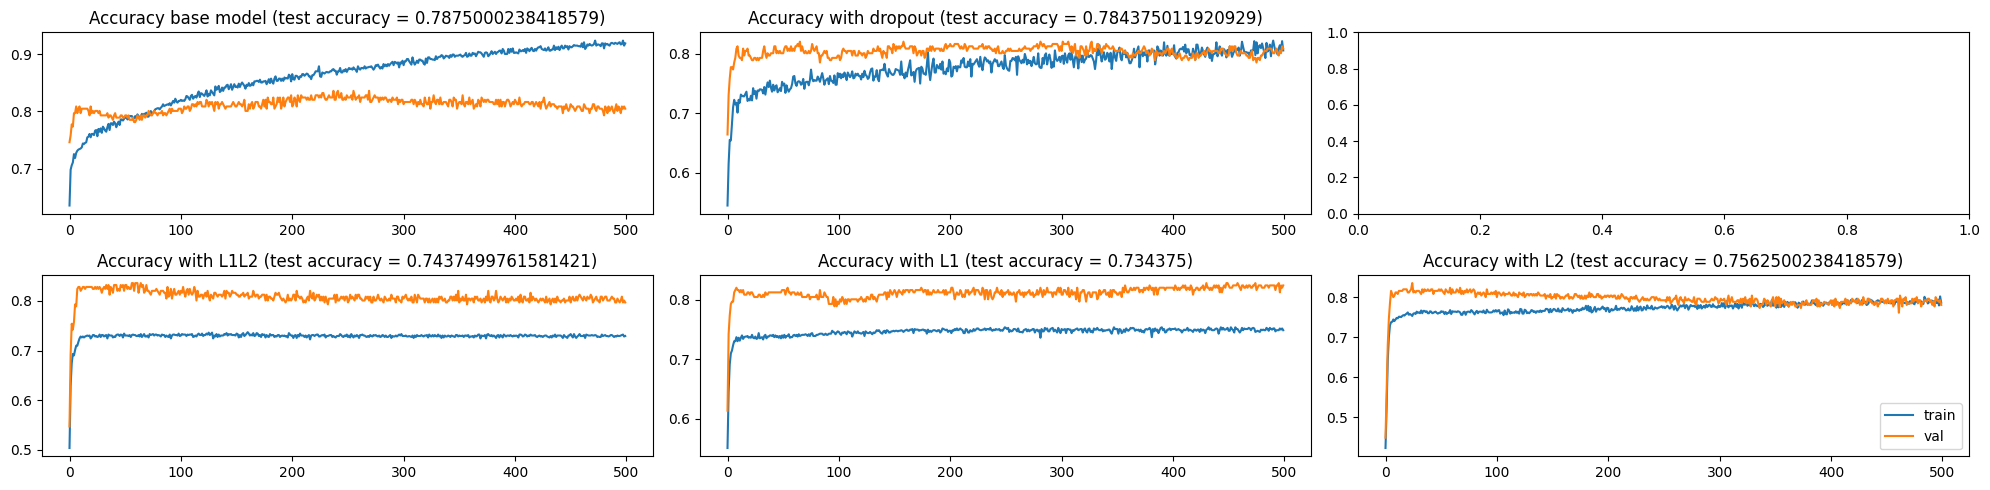

In [21]:
import matplotlib.pyplot as plt

def plot_accuracy(ax, history, title, test_accuracy):
    ax.plot(history.history['accuracy'], label='train')
    ax.plot(history.history['val_accuracy'], label='val')
    ax.set_title(f'Accuracy {title} (test accuracy = {test_accuracy})')

fig, ax = plt.subplots(2, 3, figsize=(20, 5))
plot_accuracy(ax[0, 0], base_history, 'base model', base_accuracy)
plot_accuracy(ax[0, 1], drop_history, 'with dropout', drop_accuracy)
plot_accuracy(ax[1, 0], reg_history_l1l2, 'with L1L2', reg_accuracy_l1l2)
plot_accuracy(ax[1, 1], reg_history_l1, 'with L1', reg_accuracy_l1)
plot_accuracy(ax[1, 2], reg_history_l2, 'with L2', reg_accuracy_l2)


plt.legend()
plt.tight_layout()
plt.show()


## Tasks and Questions
1. Implement L1/L2 regularization and Dropout in the provided model structures.
2. Implement the visualizations.
3. Observe the effect of each technique on model performance.
4. Discuss which regularization technique seemed most effective and why.

## Conclusion
* Lower drop out rate to lower noize